# Iris Project Agenda
### Import Libraries

In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Data Loading

In [451]:
data = pd.read_csv("IRIS.csv")

In [453]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [455]:
data.shape

(150, 5)

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [459]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [461]:
data["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [463]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [465]:
counter=data["species"].value_counts()

In [467]:
counter

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7df9221d3080>,
 [Text(0.5999999675667398, 1.0392305032666773, 'Iris-setosa'),
  Text(-1.199999999999995, -1.1235210826980003e-07, 'Iris-versicolor'),
  Text(0.6000001621662929, -1.0392303909145566, 'Iris-virginica')],
 [Text(0.3499999810805982, 0.6062177935722284, '33.33%'),
  Text(-0.699999999999997, -6.553872982405e-08, '33.33%'),
  Text(0.3500000945970042, -0.6062177280334914, '33.33%')])

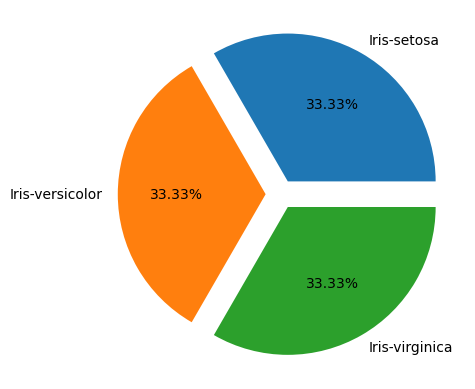

In [469]:
plt.pie(counter,labels=data["species"].unique(),autopct='%1.2f%%',explode=(.1,.1,.1))

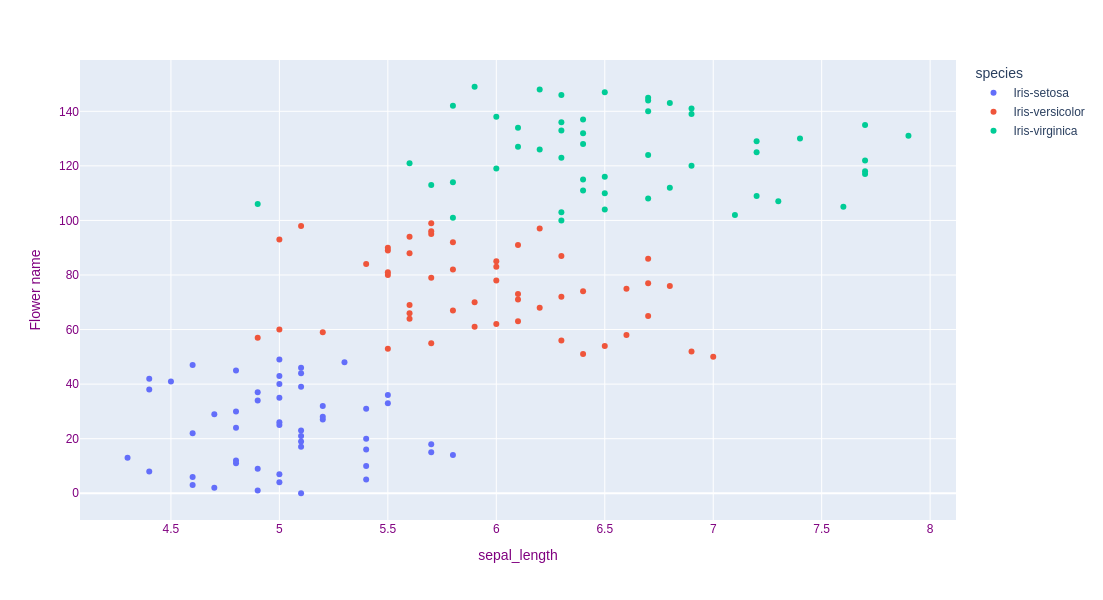

In [471]:
fig = px.scatter(data_frame=data,x="sepal_length",color="species")
fig.update_layout(width=800,height=600,
                  xaxis=dict(title="sepal_length",color="purple"),
                  yaxis=dict(title="Flower name",color="purple"))
fig.show()

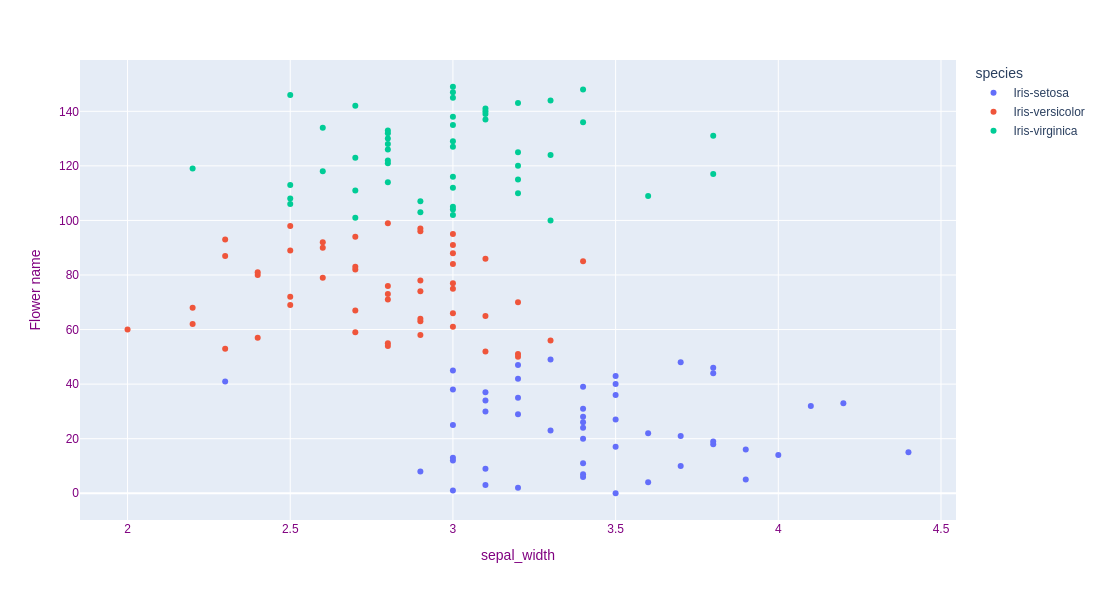

In [473]:
fig = px.scatter(data_frame=data,x="sepal_width",color="species")
fig.update_layout(width=800,height=600,
                  xaxis=dict(title="sepal_width",color="purple"),
                  yaxis=dict(title="Flower name",color="purple"))
fig.show()

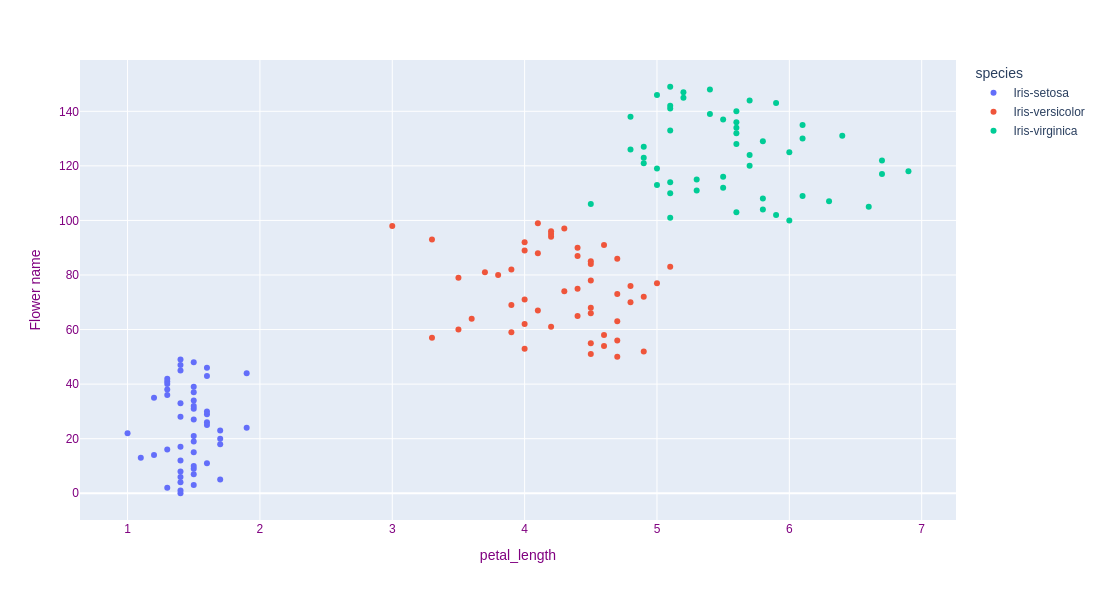

In [474]:
fig = px.scatter(data_frame=data,x="petal_length",color="species")
fig.update_layout(width=800,height=600,
                  xaxis=dict(title="petal_length",color="purple"),
                  yaxis=dict(title="Flower name",color="purple"))
fig.show()

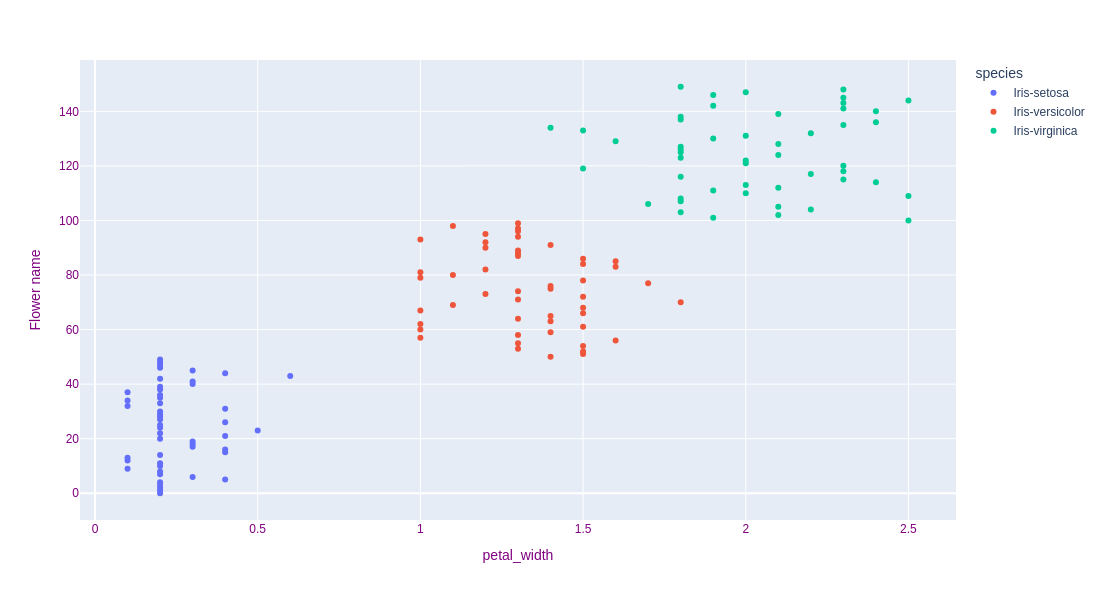

In [476]:
fig = px.scatter(data_frame=data,x="petal_width",color="species")
fig.update_layout(width=800,height=600,
                  xaxis=dict(title="petal_width",color="purple"),
                  yaxis=dict(title="Flower name",color="purple"))
fig.show()

In [478]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
data["species"]=la.fit_transform(data["species"])

In [479]:
data["species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

### Data Splitting

In [484]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [486]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [488]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [490]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split( x , y , test_size=0.2 , shuffle=True , random_state=42)

In [492]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

In [494]:
x_train.shape , y_train.shape

((120, 4), (120,))

In [496]:
x_test.shape , y_test.shape

((30, 4), (30,))

### Create Model

In [499]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100] , 'gamma':[1,0.1,0.01,0.001]}

SVC= GridSearchCV( SVC() , param_grid , verbose=1 )

In [501]:
SVC.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [502]:
SVC.best_params_

{'C': 1, 'gamma': 1}

In [505]:
y_pred = SVC.predict(x_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Evaluate Model

In [508]:
from sklearn.metrics import accuracy_score , confusion_matrix

accuracy_score(y_pred , y_test)

1.0

<Axes: >

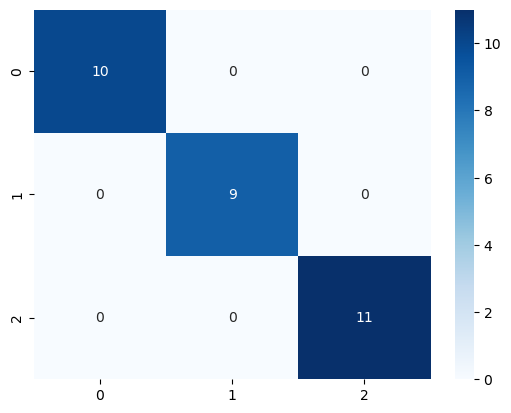

In [510]:
cm =confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap="Blues")

In [512]:
prediction = SVC.predict([[7.3,2.9,6.3,1.8]])

/home/amr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



In [514]:
prediction

array([2])

In [516]:
decode_labels=la.inverse_transform(prediction)
decode_labels

array(['Iris-virginica'], dtype=object)

In [518]:
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [520]:
prediction = SVC.predict([[4.9,3.0,1.4,0.2]])
decode_labels=la.inverse_transform(prediction)
prediction , decode_labels

/home/amr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



(array([0]), array(['Iris-setosa'], dtype=object))

### Import 'PIckle' Library

In [523]:
import pickle 

with open("Iris_model.pkl",'wb') as file:
    pickle.dump(SVC,file)

In [525]:
# Load the model from the pickle file
with open("Iris_model.pkl",'rb') as file:
    loaded_model = pickle.load(file)

In [529]:
prediction = loaded_model.predict([[4.9,3.0,1.4,0.2]])
prediction

/home/amr/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])